# Representation of signals & inverse problems - G1-G2
---
## Lab session 4: Gradient descent

---
## Guidelines (read carefully before starting)

**Objective**: this lab is divided into two part. The first part summarizes the theoretical notions used throughout this lab, and does not contain any question. The second part contains 3 exercises, which will guide you through the following
1. introduction to gradient descent on a toy example;
2. image denoising with the gradient descent;
3. image inpainting with the projected gradient descent.

In [ ]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
# %matplotlib widget
%matplotlib inline
#%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # to be used later on for plotting
from PIL import Image  # library to load images

>[Representation of signals & inverse problems - G1-G2](#scrollTo=yIMSm0hXQhdA)

>>[Lab session 4: Gradient descent](#scrollTo=yIMSm0hXQhdA)

>>[Guidelines (read carefully before starting)](#scrollTo=72U8kgZFQhdC)

>>[Contents](#scrollTo=aWgMk3yLQhdE)

>>[Theory  (↑)](#scrollTo=avQ59WNjQhdE)

>>>[Gradient descent  (for Exercise I and Exercise II)](#scrollTo=7rXeI5m_QhdE)

>>>[Projected gradient descent  (for Exercise III)](#scrollTo=BfNniG91QhdE)

>>>[Inverse problems and discrete gradient operator  (for Exercise II and Exercise III)](#scrollTo=7acjVN9nQhdF)

>>>>[Generalities](#scrollTo=7acjVN9nQhdF)

>>>>[Imaging inverse problems](#scrollTo=ESDdkuBAQhdG)

>>>>[Discrete gradient: definition and illustration (useful for exercise III)](#scrollTo=XQavi3FpQhdG)

>>[Exercises](#scrollTo=C2PK70NRQhdL)

>>>[I. A gentle introduction to gradient descent  (↑)](#scrollTo=C2PK70NRQhdL)

>>>>[Questions:](#scrollTo=Ow8Wr-8WQhdR)

>>>[II. Image denoising with the gradient descent  (↑)](#scrollTo=HCa_5bV3QhdS)

>>>>[Generating synthetic data](#scrollTo=YIhh5t4sQhdS)

>>>>[Gradient descent algorithm](#scrollTo=HL9n0LqMQhdU)

>>>>[Interpretation of the results](#scrollTo=S6kXdY98QhdW)

>>>[III. Image inpainting with the projected gradient descent  (↑)](#scrollTo=uIH_uK29QhdW)

>>>>[Synthetic data generation](#scrollTo=s2XxLiIVQhdX)

>>>>[Projected gradient descent](#scrollTo=FZVf5ubUQhdY)

>>>>[Interpretation of the results](#scrollTo=cYILY63JQhdZ)



## Contents <a name="content"></a>
1. [Theory](#theory)
    1. [Gradient descent](#gradient_descent)
    2. [Projected gradient descent](#proj_gradient_descent)
    3. [Inverse problems and discrete gradient operator](#inv_pb)
2. [Exercises](#questions)
    1. [A gentle introduction to gradient descent](#ex_1)
    2. [Image denoising with the gradient descent](#ex_2)
    3. [Image inpainting with the projected gradient descent](#ex_3)

---
## Theory <a name="theory"></a> [(&#8593;)](#content)

### Gradient descent <a name="gradient_descent"></a> (for [Exercise I](#ex_1) and [Exercise II](#ex_2))

Consider the minimization of a convex smooth function $f : \mathbb{R}^N \rightarrow \mathbb{R}$, expressed as
$$\underset{x \in \mathbb{R}^N}{\min} f(x).$$

In this setting, a solution to the above problem can be estimated with the *gradient method*, which  iteratively computes

$$ x^{(k+1)} = x^{(k)} - \tau \nabla f(x^{(k)}), $$

starting from an arbitrary initial point $x^{(0)} \in \mathbb{R}^N$, where $\nabla f(x) \in \mathbb{R}^N$ is the gradient of $f$ at $x$.

The sequence $(x^{(k)})_{k\in\mathbb{N}}$ is guaranteed to converge to a minimizer $x^\star$ of $f$ whenever the stepsize verifies
$$0 < \tau < 2/\beta$$
where $\beta$ is a Lipschitz constant of $\nabla f$.

> **Remark**: For instance, if $f$ is of class $\mathscr{C}^2$, $$\beta= \sup_{x} \Vert Hf(x) \Vert$$
where $Hf(x) \in \mathbb{R}^{N \times N}$ is the Hessian of $f$ at $x$ and $\Vert \cdot \Vert$ is the spectral operator norm (largest eigenvalue).

### Projected gradient descent <a name="proj_gradient_descent"></a> (for [Exercise III](#ex_3))

For some applications, the problem consists in minimizing a smooth convex cost function $f$, subject to the constraint that the solution belongs to a closed convex set $\Omega \subset \mathbb{R}^N$. The optimization problem can be formulated as
$$\underset{x \in \Omega}{\min} f(x)\quad\equiv\quad\underset{x \in \mathbb{R}^N}{\min} f(x)\quad\mbox{s.t.}\quad x\in\Omega \equiv\quad\underset{x \in \mathbb{R}^N}{\min} f(x) + \iota_{\Omega}(x)$$
where $\iota_{\Omega}$ is the indicator function of the set $\Omega$ ($\iota_{\Omega}(x) = 0$ if $x \in \Omega$, $+\infty$ otherwise).

Starting from an arbitrary initial point $x^{(0)} \in \mathbb{R}^N$, a natural extension of the gradient descent, the *projected gradient descent*, iteratively computes
$$ x^{(k+1)} = P_\Omega\big(x^{(k)} - \tau \nabla f(x^{(k)})\big), $$

where $k \in \mathbb{N}$, and $P_\Omega$ is the orthogonal projector onto $\Omega$ (since $\Omega$ is a closed convex set, the projection exists and is unique). Note that $P_\Omega$ is the proximal operator of the indicator function: the projected gradient descent is thus a special case of the proximal gradient descent introduced in the lecture. Convergence of the iterates $x^{(k)}$ to a solution $x^\star$ of the problem is guaranteed, provided that $0<\tau<2/\beta$ (with $\beta$ the Lipschitz contant of $\nabla f$).

### Inverse problems and discrete gradient operator <a name="inv_pb"></a> (for [Exercise II](#ex_2) and [Exercise III](#ex_3))

#### Generalities
An imaging inverse problem consists in estimating an unknown image $\bar{x}$ from data $y$ containing partial, degraded information about $\bar{x}$. We consider a forward model of the form

$$y=A\bar{x} + n$$

where $A$ is a known linear observation/degradation operator, and $n$ a realization of a random vector. We further assume that the noise is white and Gaussian.

In general, the operator $A$ is not invertible, which makes the problem ill-posed. Prior information about the is thus needed to regularize the problem and make it well-posed.

#### Imaging inverse problems <a name="imaging_inverse_problem"></a>

- For imaging applications, $x \in \mathbb{R}^{N_1 \times N_2}$. In practice, the image $x$ can be stored either as a matrix, or as a vector in $\mathbb{R}^{N}$, with $N = N_1 N_2$ (*e.g.*, by stacking the columns or the rows of $x$). In the rest of this lab, we will slightly abuse notations by using the same notation $x$, whether the image is considered in matrix or vector form.

- **Tikhonov regularization**: $\bar{x}$ can be estimated as a solution to
$$\underset{x \in \mathbb{R}^N}{\min} \frac{1}{2}\|Ax-y\|^2_{\text{F}} + \frac{\lambda}{2}\|Dx\|^2_{\text{F}}$$
where $D$ a linear operator to be specified, $\lambda > 0$ is a regularization parameter whose value depends on the noise level, and $\|\cdot\|_F$ is the Frobenius norm

\begin{equation}
    (\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \|x\|_F^2 = \sum_{n_1, n_2} x_{n_1, n_2}^2.
\end{equation}

Gradient descent can be used to solve the above problem, since the objective function to be minimized is smooth (quadratic). In addition
$$(\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \nabla f(x) = A^*(Ax-y) + \lambda D^*Dx = (A^*A + \lambda D^*D)x - A^*y.$$

Note that the expression of the operators $A^*A$ (where $A^*$ is the adjoint of $A$) and $D^*D$ are needed to compute $\nabla f(x)$.

- **Regularization of natural images**: Natural images exhibit smooth spatial variations of the pixels values, implying that their discrete gradient has a low energy. This motivates the use of Tikhonov regularization based on the discrete gradient, as illustrated in the next paragraph.

#### Discrete gradient: definition and illustration (useful for [exercise III](#ex_3))

- **Definition**: The discrete gradient is fundamental in image processing to encode prior knowledge about the spatial content of the image. It is defined as a linear operator $D : \mathbb{R}^{N_1 \times N_2} \rightarrow \mathbb{R}^{N_1 \times N_2} \times \mathbb{R}^{N_1 \times N_2}$ mapping an image to a pair of images, obtained by computing vertical and horizontal differences between the pixel values, respectively. Assuming von Neumann boundary conditions (*i.e.*, a difference accross a boundary is set to 0), the operator can be defined as

\begin{equation}
    Dx = (D_V x, D_H x)
\end{equation}
with

\begin{align}
    D_V x \in \mathbb{R}^{N_1 \times N_2}, \quad (\forall n_2 \in \{0, \dotsc, N_2-1\}) \; (D_V x)_ {n_1, n_2} = \begin{cases}
     x_{n_1+1,n_2}-x_{n_1,n_2} \mbox{ if } n_1 \in \{0, \dotsc, N_1-2\} \\
     0 \mbox{ otherwise.}
    \end{cases} \\
    %
    D_H x \in \mathbb{R}^{N_1 \times N_2}, \quad (\forall n_1 \in \{0, \dotsc, N_1-1\}) \; (D_H x)_ {n_1, n_2} = \begin{cases}
     x_{n_1,n_2+1}-x_{n_1,n_2} \mbox{ if } n_2 \in \{0, \dotsc, N_2-2\} \\
     0 \mbox{ otherwise.}
    \end{cases}
\end{align}


In the rest of this lab, we will consider the quantity $\|Dx\|_F^2$, defined as

\begin{equation}
    \|Dx\|_F^2 = \|D_V x\|_F^2 + \|D_H x\|_F^2 = \sum_{n_1, n_2} (D_V x)^2_{n_1,n_2} + (D_H x)^2_{n_1,n_2}.
\end{equation}

- **Illustration and example codes**:

a) We first load a ground truth image $\bar{x}$ and display it.

In [ ]:
# Load the image

imgpil = Image.open("/content/boat.png")
x_bar = np.array(imgpil)
imgpil.close()

print("Image size: %s x %s." % (x_bar.shape[0], x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(float)  # ensure pixel values are floating point numbers

Image size: 512 x 512.
Pixel values are in the interval [0,239].


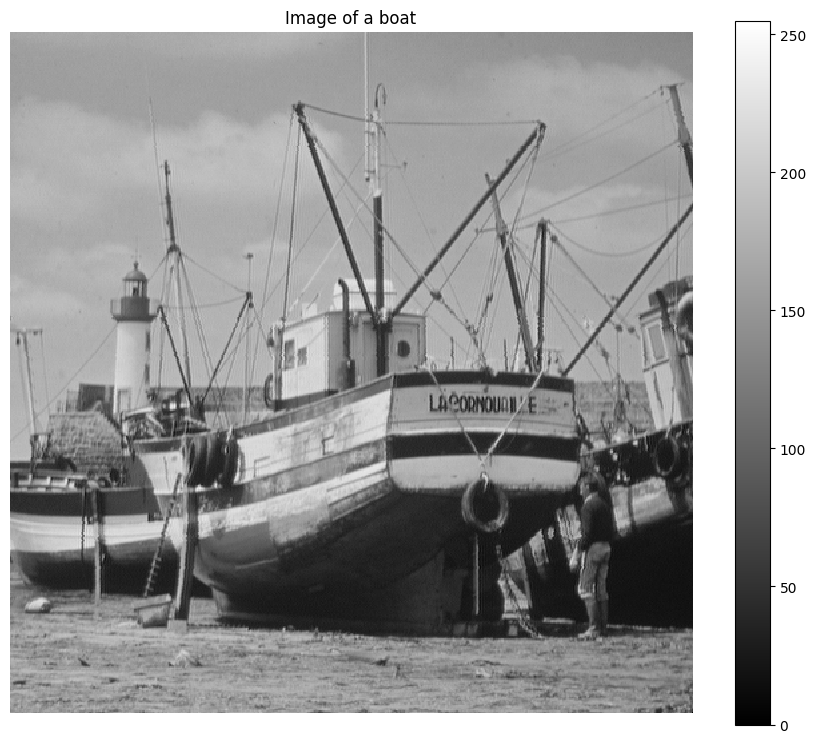

In [ ]:
# Display the image

plt.figure(figsize=(11, 11))
plt.imshow(x_bar, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=255)
plt.colorbar()
plt.axis("off")
plt.subplots_adjust(top=0.75)
plt.title("Image of a boat")
plt.show()

b) We implement the discrete gradient operator $D$ in a Python function

In [ ]:
def D(x):
    vdiff = np.r_[
        np.diff(x, 1, 0), np.zeros([1, x.shape[1]])
    ]  # the r_ command concatenates along the rows
    hdiff = np.c_[
        np.diff(x, 1, 1), np.zeros([x.shape[0], 1])
    ]  # the c_ command concatenates along the columns
    return np.concatenate(
        (vdiff[..., np.newaxis], hdiff[..., np.newaxis]), axis=2
    )  # combination along a third dimension

# An alternative, more compact, definition:
# D = lambda x : c_['2,3',r_[np.diff(x,1,0), np.zeros([1,x.shape[1]])],c_[np.diff(x,1,1), np.zeros([x.shape[0],1])]]

v = D(x_bar)

and display the two components of $D\bar{x}$ as two grayscale images.

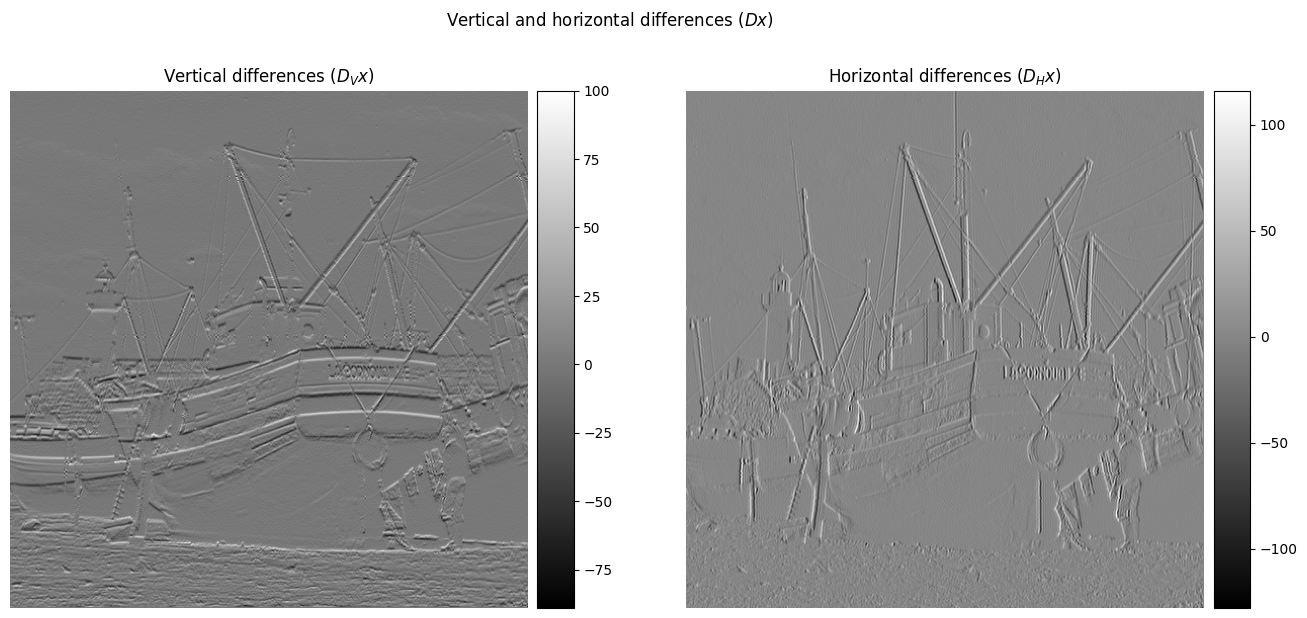

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (axv, axh) = plt.subplots(1, 2, figsize=(16, 7))
plt.suptitle(r"Vertical and horizontal differences ($Dx$)")
imv = axv.imshow(v[:, :, 0], cmap=plt.cm.gray)
imh = axh.imshow(v[:, :, 1], cmap=plt.cm.gray)
axv.axis("off")
axh.axis("off")
axv.set_title("Vertical differences ($D_V x$)")
axh.set_title("Horizontal differences ($D_H x$)")
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()

c) Displaying the quantity $\|D\bar{x}\|_F = \sqrt{\|D_V \bar{x}\|^2_F + \|D_H \bar{x}\|^2_F}$,

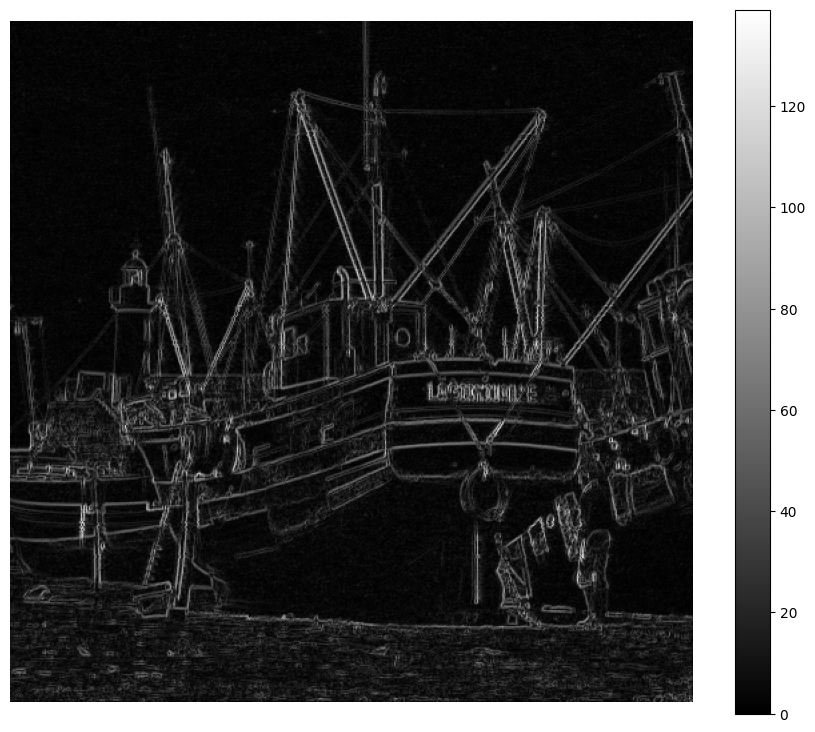

In [ ]:
plt.figure(figsize=(11, 11))
plt.imshow(np.sqrt(np.sum(v ** 2, 2)), cmap=plt.cm.gray, vmin=0)
plt.colorbar()
plt.axis("off")
plt.subplots_adjust(top=0.75)

we observe that the energy is concentrated around edges, and relatively low in other pixels. This indicates that the magnitude of the pixels in the discrete gradient appears to be relatively low, except on the edges.

d) Finally, we implement the adjoint of the discrete gradient operator

In [ ]:
def D_adj(v):
    return (
        np.r_["0,2", -v[0, :, 0], -np.diff(v[:-1, :, 0], 1, 0), v[-2, :, 0]]
        + np.c_["1,2", -v[:, 0, 1], -np.diff(v[:, :-1, 1], 1, 1), v[:, -2, 1]])

$D^*$ can be viewed as the opposite of a discrete divergence operator. One can check that $\|D x\|^2 - \langle D^*Dx, x \rangle=0$ to verify that the two operators are adjoint.

In [ ]:
(D(x_bar) ** 2).sum() - (D_adj(D(x_bar)) * x_bar).sum()

0.0

---
## Exercises

### I. A gentle introduction to gradient descent <a name="ex_1"></a> [(&#8593;)](#content)

Consider the minimization of a quadratic form in $\mathbb{R}^2$ ($N=2$)
$$ f(x) = \frac{1}{2} \bigl( x_1^2 + \eta x_2^2 \bigr)$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

We first define the anisotropy parameter $\eta$ and the function $f$

In [ ]:
eta = 8
f = lambda x: (x[:, 0] ** 2 + eta * x[:, 1] ** 2) / 2

We display the values taken by the function using a contourplot.

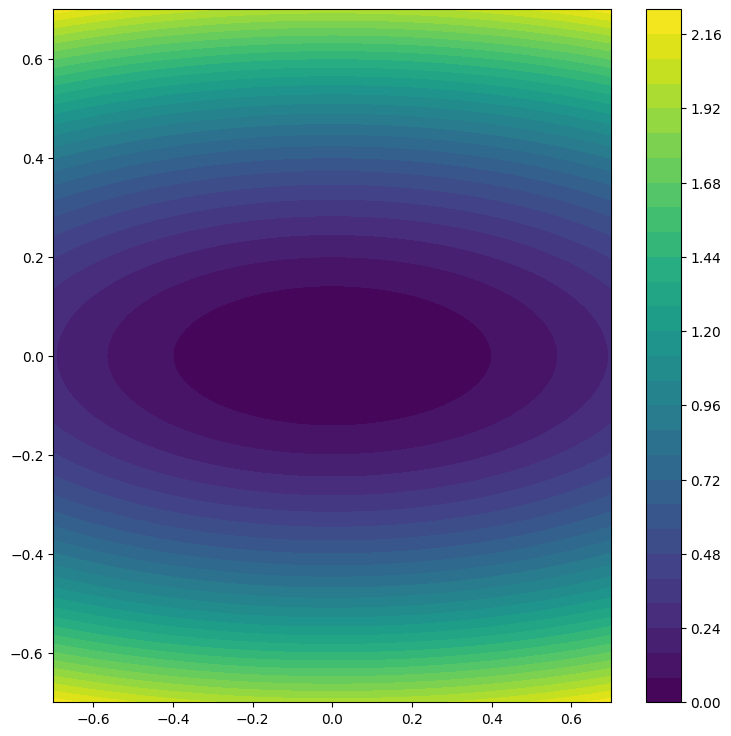

In [ ]:
plt.figure(figsize=(9,9))
t = np.linspace(-0.7, 0.7, 101)
[u, v] = np.meshgrid(t, t)
F = (u ** 2 + eta * v ** 2) / 2
plt.contourf(t, t, F, 35)
plt.colorbar()
plt.show()

We define the gradient of $f$:

In [ ]:
grad_f = lambda x: np.array([x[0], eta * x[1]])

Since $f$ is quadratic, its Hessian is the constant matrix $\left(\begin{array}{cc}1&0\\0&\eta\end{array}\right)$. Its spectral norm, which is the Lipschitz constant of `grad_f`, is $\beta=\max(1,\eta)$. Since the stepsize $\tau$ must satisfy $0< \tau < 2/\beta$, we take

In [ ]:
tau = 1.8 / max(eta, 1)
tau

0.225

Now we implement the gradient descent method: given the initial estimate $x^{(0)}$ of the solution, the stepsize $\tau$ and the number $k$ of iterations, we compute $x^{(k)}$:

In [ ]:
nbiter = 10
x = np.array([1, 1])  # initial estimate of the solution
for iter in range(nbiter):  # iterations from 0 to nbiter-1
    x = x - tau * grad_f(x)
print(x)  # display the value of the solution

[0.07816584 0.10737418]


We encapsulate the above code in a function `gradient_descent`.

In [ ]:
def gradient_descent(x0, grad_f, tau, nbiter):
    x = x0
    for iter in range(nbiter):  # iterations from 0 to nbiter-1
        x = x - tau * grad_f(x)
    return x

We modify the previous `gradient_descent` function to store the iterates in a matrix (2-D array).

In [ ]:
def gradient_descent(x0, grad_f, tau, nbiter):

    X = np.zeros((nbiter + 1, x0.size))
    X[0, :] = x0
    for iter in range(nbiter):
        X[iter + 1, :] = X[iter, :] - tau * grad_f(X[iter, :])
    return X

In [ ]:
X = gradient_descent(np.array([0.6, 0.6]), grad_f, 0.225, 30)

We plot the cost function $f(x^{(k)})$ as a function of $k$, in log-scale:

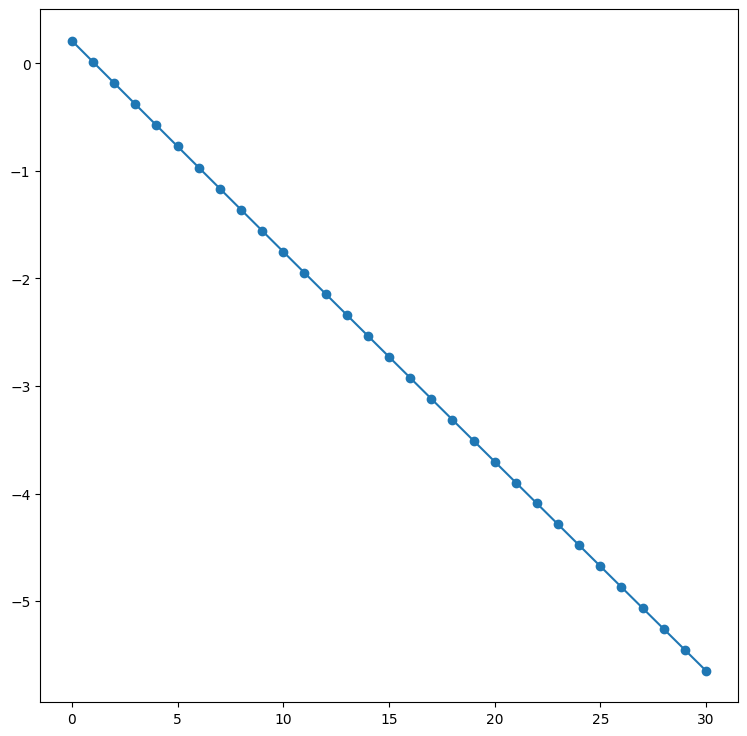

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(range(X.shape[0]), np.log10(f(X)), "o-")
plt.show()

Observe that the gradient descent algorithm is monotonic, in that $f(x^{(k)})$ decreases from one iteration to another.

We plot the iterates above the contourplot of $f$:

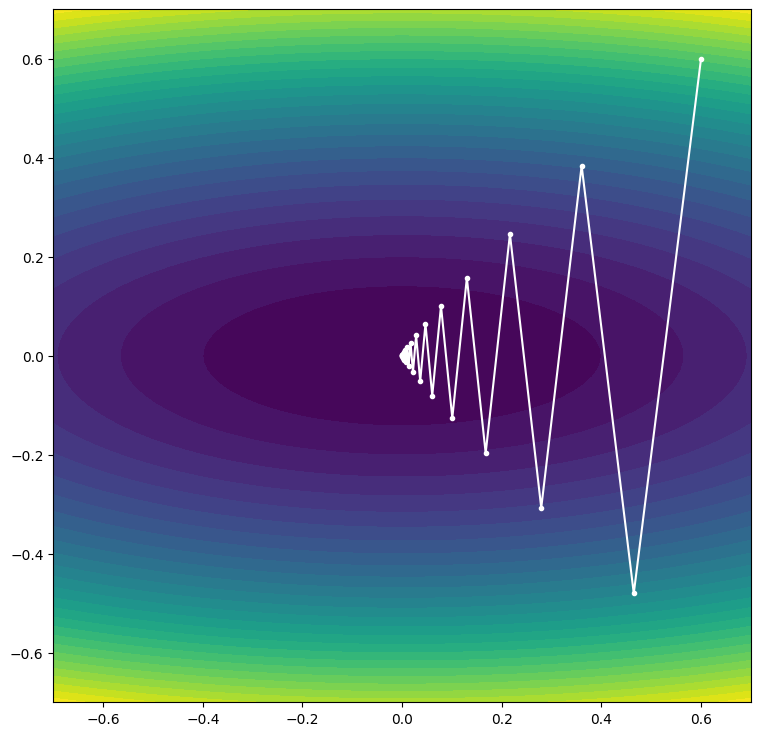

In [ ]:
plt.figure(figsize=(9,9))
plt.contourf(t, t, F, 35)
plt.plot(X[:, 0], X[:, 1], "w.-")
plt.show()

#### Questions:

1. Adapt the previous cells to run the algorithm with different values of tau (try 0.25,0.225,0.2,0.05). Qualitatively, is the algorithm converging for each of these values? For which value does it converge the fastest to the solution?
2. Try a different initial estimate (e.g., a randomly generated one). Does the algorithm still converge to the solution of the problem? Justify your statement with a theoretical argument from the lectures.

**Answers**

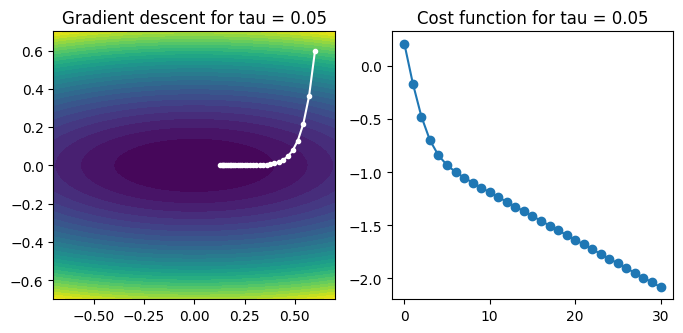

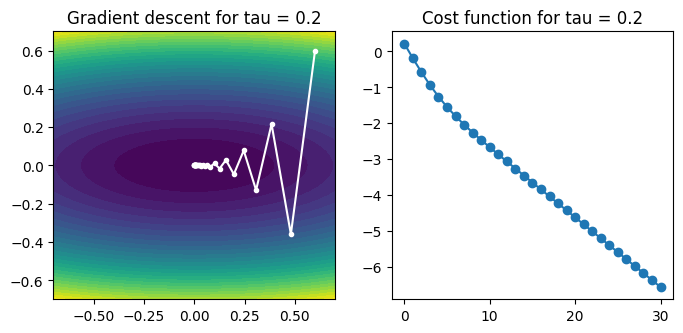

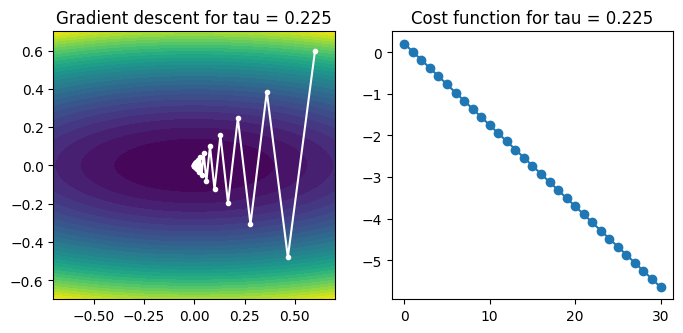

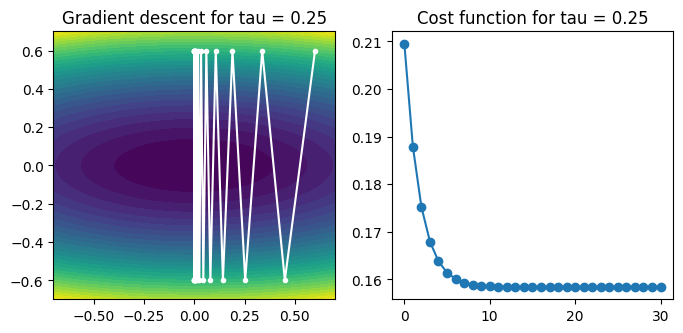

In [ ]:
# 1.

taus = [0.05, 0.2, 0.225, 0.25]

for i in range(len(taus)):

  X_tau =  gradient_descent(np.array([0.6, 0.6]), grad_f, taus[i], 30)

  plt.figure(figsize=(8,16))

  plt.subplot(len(taus),2,2*i+1)
  plt.contourf(t, t, F, 35)
  plt.title("Gradient descent for tau = {}".format(taus[i]))
  plt.plot(X_tau[:, 0], X_tau[:, 1], "w.-")

  plt.subplot(len(taus),2,2*i+2)
  plt.plot(range(X_tau.shape[0]), np.log10(f(X_tau)), "o-")
  plt.title("Cost function for tau = {}".format(taus[i]))
  #plt.tight_layout()
  plt.show()


1.

- tau = 0.05 : The algorithm converges.
- tau = 0.2 : The algorithm converges.
- tau = 0.225 : The algorithm converges.
- tau = 0.25 : The algorithm does not converge. Indeed the condition tau < 2/beta is not respected (tau = 2/beta).

Among these values of tau, the cost function indicates that the algorithm converges the fastest for tau = 0.2 (cf. cell above).

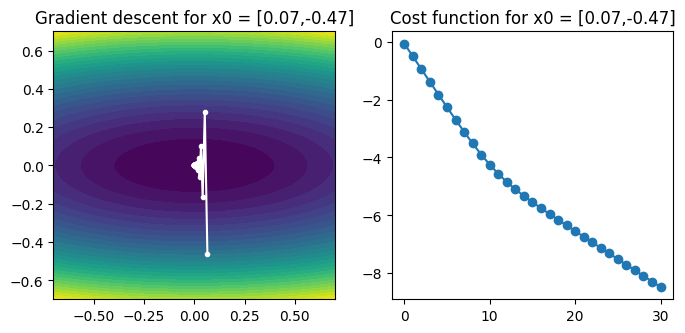

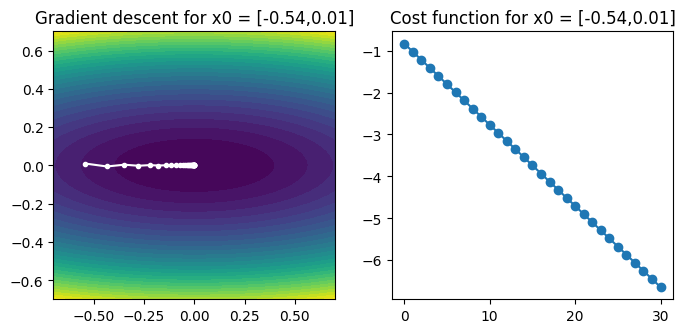

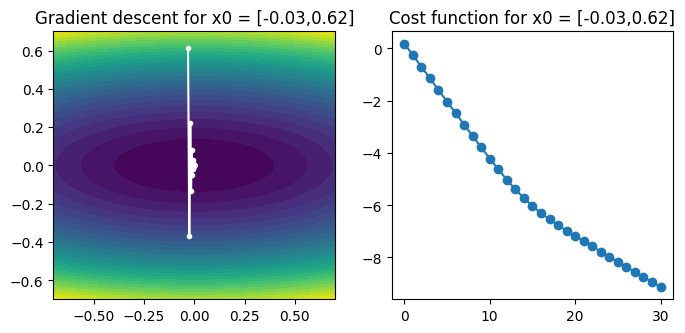

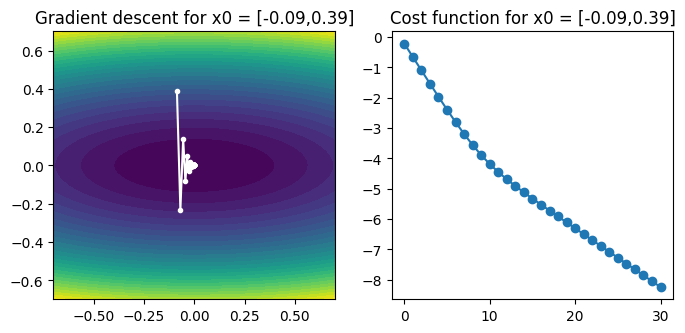

In [ ]:
# 2.

rng = np.random.default_rng(seed=0)

x0s = 0.7*(rng.random((4,2))-rng.random((4,2)))

for i in range(len(x0s)):

  X_x0 =  gradient_descent(np.array([x0s[i]]), grad_f, 0.2, 30)

  plt.figure(figsize=(8,16))

  plt.subplot(len(x0s),2,2*i+1)
  plt.contourf(t, t, F, 35)
  plt.title("Gradient descent for x0 = [{},{}]".format(np.round(x0s[i][0],2),np.round(x0s[i][1],2)))
  plt.plot(X_x0[:, 0], X_x0[:, 1], "w.-")

  plt.subplot(len(x0s),2,2*i+2)
  plt.plot(range(X_x0.shape[0]), np.log10(f(X_x0)), "o-")
  plt.title("Cost function for x0 = [{},{}]".format(np.round(x0s[i][0],2),np.round(x0s[i][1],2)))
  #plt.tight_layout()
  plt.show()


2.

The algorithm converges no matter the initial estimate (cf. cell above).
<br><br>
f is a coercive, differentiable function admitting a Lipschitz continuous gradient, with Lipschitz constant beta > 0. Thus, the gradient descent converges towards a solution to the optimization problem whenewer $0 < \tau < 2/\beta$.
f being strictly convex, this solution is unique.

---
### II. Image denoising with the gradient descent <a name="ex_2"></a> [(&#8593;)](#content)

Denoising an image $y \in \mathbb{R}^{N_1\times N_2}$ can be seen as a special instance of the problem described in the [theory paragraph above](#imaging_inverse_problem) with $A = I$, the identity operator. Assuming the noise corrupting the data is white and Gaussian, of variance $\sigma^2$, denoising can be formulated as
$$\underset{x \in \mathbb{R}^N}{\min} \frac{1}{2}\|x-y\|_F^2+\frac{\lambda}{2}\|Dx\|^2_F.$$

> Note that $x$ belongs to a Euclidean space of dimension $N=N_1 N_2$, which is the number of pixels composing the image.

> For numerical applications, we will consider $\lambda = 8$.

#### Generating synthetic data

1\. **[Python]** Load a ground truth image with Python, stored in a variable `x_bar` (you can use the sample code given in the [Theory](#theory) section).

In [ ]:
# 1.

imgpil = Image.open("/content/cortex.png")
x_bar = np.array(imgpil)
imgpil.close()

print("Image size: %s x %s." % (x_bar.shape[0], x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(float)  # ensure pixel values are floating point numbers

Image size: 443 x 443.
Pixel values are in the interval [0,255].


2\. **[Theory/Python]** The input signal-to-noise ratio (iSNR) is defined as

\begin{equation}
    \text{iSNR} = 10\log_{10} \biggl( \frac{\|y_0\|_{\text{F}}^2}{N\sigma^2} \biggr)
\end{equation}

where $y_0 \in \mathbb{R}^{N_1\times N_2}$ denotes the noiseless data (i.e., $y_0 = \bar{x}$ for the denoising problem), and $\sigma^2$ is the variance of the white Gaussian noise.

a) Give the expression of $\sigma^2$ in function of the $\text{iSNR}$. Compute its value for $\text{iSNR} = 20$ dB, and generate the noisy data using the measurement model

\begin{equation}
    y = \bar{x} + n = y_0 + n
\end{equation}

with $n$ a realization of the random vector $\underline{n} \sim \mathcal{N}(0, \sigma^2 I)$.

2. a)  
\begin{equation}
\sigma^2 = \frac{\|y_0\|_{\text{F}}^2}{N \times 10^{(\text{iSNR}/10)}}
\end{equation}

In [ ]:
# 2.a)

def norm(y):
    sum = 0
    for i in range(len(y)):
        for j in range(len(y[0])):
            sum+=(y[i][j])**2
    return(np.sqrt(sum))

(N1,N2) = x_bar.shape
N=N1*N2

isnr = 20    # input SNR (in dB)
sigma = np.sqrt(norm(x_bar)**2/(N*10**(isnr/10)))
print("sigma^2 = {}".format(np.round(sigma**2,1)))

n = np.zeros((N1,N2))

for i in range(len(n)):
        for j in range(len(n[0])):
            n[i][j]= rng.normal(0,sigma)

y = x_bar + n      # noisy data

sigma^2 = 68.2


b) Display the noisy image and the ground truth (with a gray colorbar).

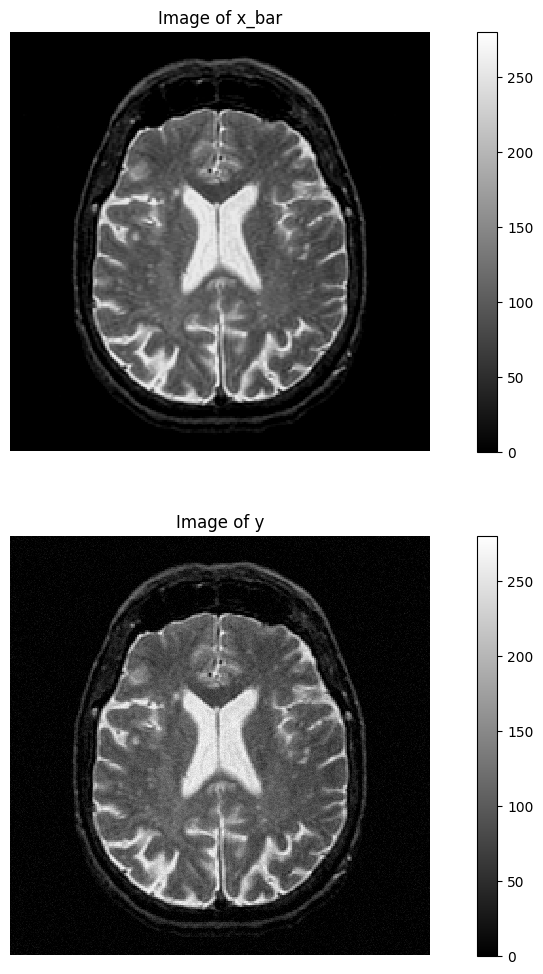

In [ ]:
# 2.b)

plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.imshow(x_bar, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=280)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Image of x_bar")

plt.subplot(212)
plt.imshow(y, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=280)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Image of y")
plt.show()

#### Gradient descent algorithm

3\. **[Theory/Python]**: Give the expression of $\nabla f$ for this denoising problem. Implement a Python function `grad_f` to compute its value, using the discrete gradient `D` and its adjoint `D_adj`.

In [ ]:
# 3.

def grad_f(x, y, Lambda):
  grad_matrix = x-y+Lambda*D_adj(D(x))
  return grad_matrix

4\. **[Python]**: The expression of the Lipschitz constant $\beta$ can be taken as $\|I+\lambda D^*D\|=1+8\lambda$. Using this information and the function `grad_f` implemented in 3., apply the gradient descent algorithm ($\approx$ 100 iterations) to estimate a solution to the denoising problem. Make sure the function returns both the final estimate and the values $(f(x^{(k)}))_k$.

> Hint: use the example gradient descent introduced in the first [exercise](#ex_1).

In [ ]:
# 4.

def gradient_descent(grad_f, y, Lambda, x0, nbiter, tau):

    X = np.zeros((nbiter + 1, x0.shape[0], x0.shape[1]))
    X[0, :, :] = x0
    for iter in range(nbiter):
        X[iter + 1, :, :] = X[iter, :, :] - tau * grad_f(X[iter, :, :], y, Lambda)
    return X

Lambda = 8
tau = 1.5 / (1 + 8 * Lambda)

estimates = gradient_descent(grad_f, y, Lambda, y, 100, tau)

#### Interpretation of the results

5\. **[Theory/Python]**: Display the denoised and the ground truth image. What do you observe? Are details well recovered? Conclude about the relevance of Tikhonov regularization for denoising natural images.

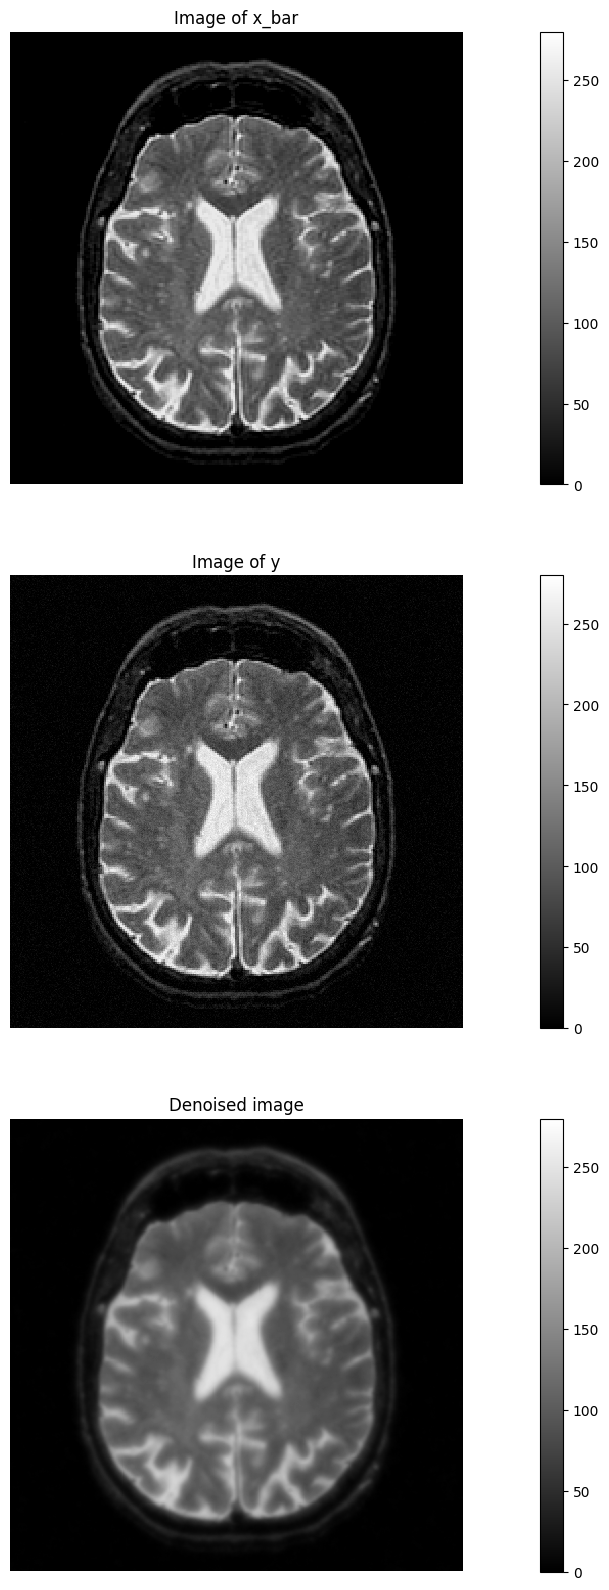

In [ ]:
# 5.

plt.figure(figsize=(20, 20))

plt.subplot(311)
plt.imshow(x_bar, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=280)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Image of x_bar")

plt.subplot(312)
plt.imshow(y, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=280)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Image of y")

plt.subplot(313)
plt.imshow(estimates[100], interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=280)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Denoised image")
plt.show()

5. It is hard to evaluate the denoising ability of Tikhonov regularization in this setup. Indeed, noise in the image y is very subtle. One can go back to the code cell where y was created with x_bar and gaussian noise with the following formula :
<br><br>
\begin{equation}
    y = \bar{x} + n
\end{equation}
and replace it by :
<br><br>
\begin{equation}
    y = \bar{x} + 10n
\end{equation}
<br>
before computing again the code cells until this cell. One can now see a very noisy y image and the associated denoised one using Tikhonov regularization. The denoised image looks like all noise ha been removed, however it is very blurry, as well as the denoised image in the previous setup with a more sublte noise. Thus, Tikhonov regularization is not adapted to the denoising of natural images as it does not handle sharpness really well.


---
### III. Image inpainting with the projected gradient descent <a name="ex_3"></a> [(&#8593;)](#content)

Inpainting consists in inferring the value of missing pixels in an image from a set of available pixels. In this section, we will recover the content of an image knowing the value of only 10% of its pixels.

We first formulate inpainting as the following optimization problem

$$\underset{x \in \Omega}{\min} f(x)\quad\equiv\quad\underset{x \in \mathbb{R}^{N_1\times N_2}}{\min} \frac{1}{2}\|Dx\|_{\text{F}}^2\quad\mbox{s.t.}\quad Ax=y.$$

#### Synthetic data generation

In [ ]:
# Load the image

imgpil = Image.open("/content/boat.png")
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0], x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(float)  # ensure pixel values are floating point numbers

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


6\. **[Python]**: The degradation operator $A$ is simply pixelwise multiplication by the binary mask, and we have $A^*=A$.

Generate a random mask to select 10% of the ground truth image $\bar{x}$ to simulate a partially observed image. Generate the image to be inpainted $y$. Display the mask and the data $y$.

> Hint: you can for instance use the `np.random.rand` function to generate the mask (of the same size as the image). Another option consists in using `np.random.choice` and `np.unravel_index`.

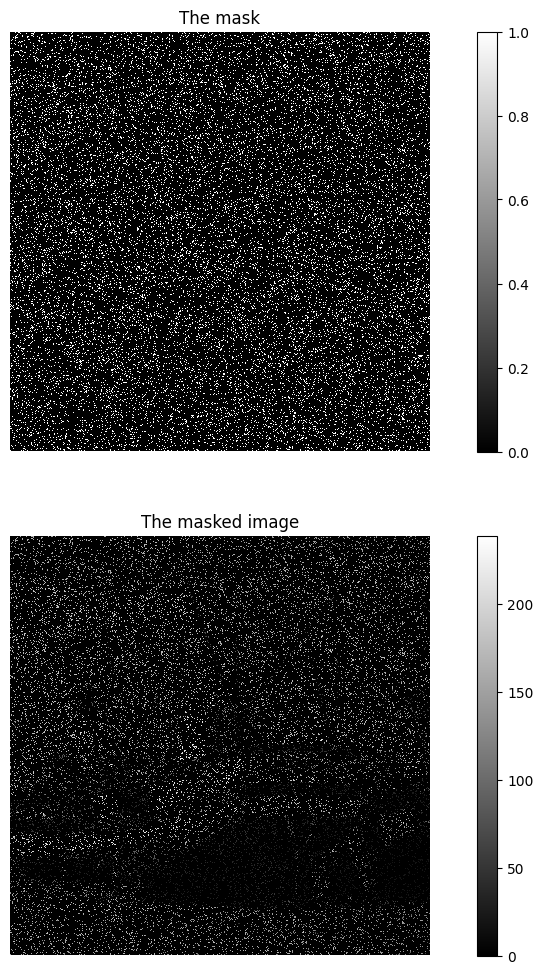

In [ ]:
# 6.

def create_mask(matrix) :
  n = matrix.shape[0]
  m = matrix.shape[1]
  mask = rng.binomial(1,0.1,(n,m))
  return mask

def apply_mask(matrix, mask) :
  n = matrix.shape[0]
  m = matrix.shape[1]
  matrix_filtred = np.zeros((n,m))
  for i in range(n):
    for j in range(m):
      matrix_filtred[i][j] = matrix[i][j]*mask[i][j]
  return matrix_filtred

mask = create_mask(x_bar)
y = apply_mask(x_bar, mask)

plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.imshow(mask, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=1)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("The mask")

plt.subplot(212)
plt.imshow(y, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=239)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("The masked image")
plt.show()

#### Projected gradient descent

7\. **[Python]** Implement a function `grad_f` to compute $\nabla f$.

In [ ]:
# 7.

grad_f = lambda x: D_adj(D(x))

8\. **[Python]** Implement a function `projection_inpainting` to compute the projection of a vector $u$ onto the closed convex set $\{x \mid Ax = y \}$.

In [ ]:
#8.

def projection_inpainting(u, y, mask):
  v = u.copy()
  for i in range(u.shape[0]):
    for j in range(u.shape[1]):
      if mask[i][j] == 1 :
        v[i][j] = y[i][j]
  return v

9\. **[Python]** Knowing that $\beta=8$, implement a projected gradient algorithm to solve the inpainting problem.

In [ ]:
# 9.

def projected_gradient_descent(grad_f, projection_inpainting, y, mask, x0, nbiter, tau):
  X = np.zeros((nbiter + 1, x0.shape[0], x0.shape[1]))
  X[0, :, :] = x0
  for iter in range(nbiter):
    X[iter + 1, :, :] = projection_inpainting(X[iter, :, :] - tau * grad_f(X[iter, :, :]), y, mask)
  return X

#### Interpretation of the results

10\. **[Theory/Python]** Apply the projected gradient algorithm starting from $x^{(0)} = y$, for 300 iterations. Display the estimated image, and conclude about the efficiency of this approach.

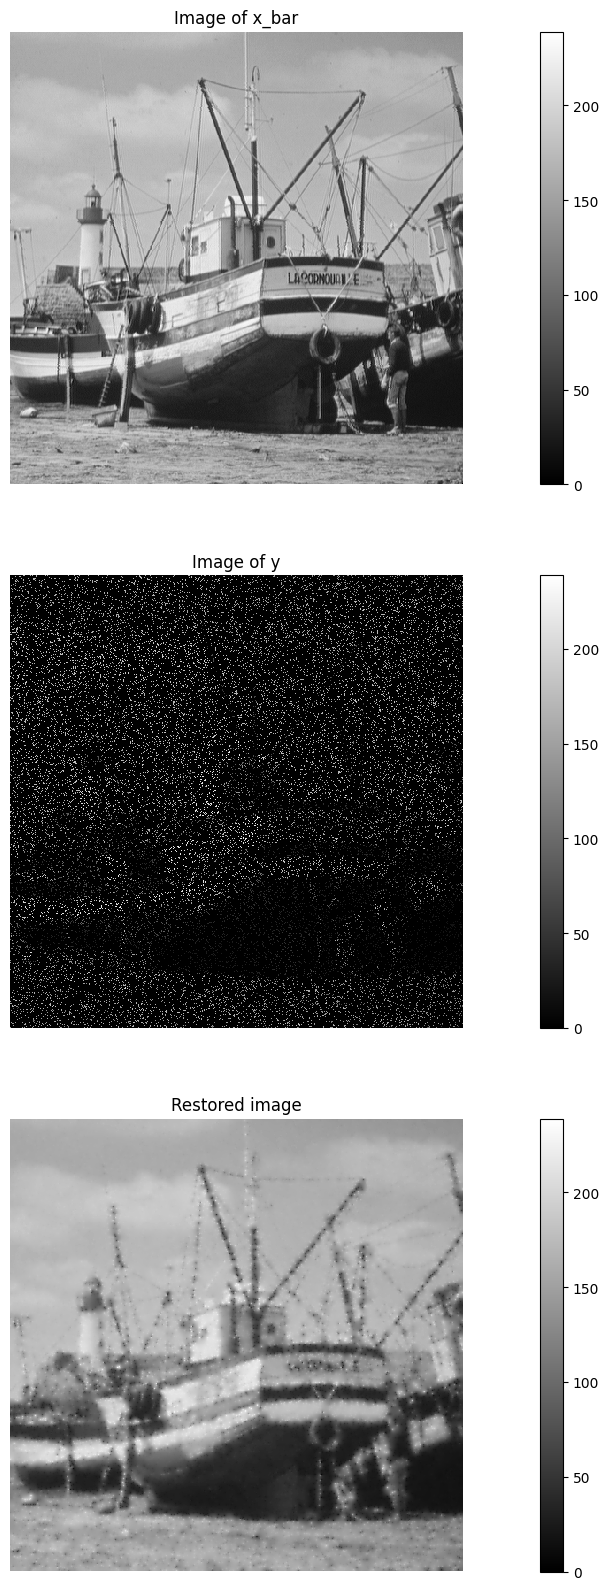

In [ ]:
# 10.

beta = 8
tau = 1.5 / beta
nbiter = 300

xrestored = projected_gradient_descent(grad_f, projection_inpainting, y, mask, y, nbiter, tau)

plt.figure(figsize=(20, 20))

plt.subplot(311)
plt.imshow(x_bar, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=239)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Image of x_bar")

plt.subplot(312)
plt.imshow(y, interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=239)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Image of y")

plt.subplot(313)
plt.imshow(xrestored[300], interpolation="None", cmap=plt.cm.gray, vmin=0, vmax=239)
plt.colorbar()  # displays the color bar close to the image
plt.axis("off")  # remove the axes (comment to restore axes)
plt.title("Restored image")
plt.show()

10. The restored image looks like the original one, but it contains noise whereas the original was sharp. However, considering this image has been restored with 90% of the pixels missing, the result is quite impressive.